In [13]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [5]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [6]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [7]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [9]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [10]:
training_epochs = 15 # 전체데이터를 한번 다 학습시킨것 == 1 epoch
batch_size = 100 # 한번에 몇개씩 학습하겠나

Epoch: 0001 cost = 2.742990982
Epoch: 0002 cost = 1.140114231
Epoch: 0003 cost = 0.894129494
Epoch: 0004 cost = 0.772774960
Epoch: 0005 cost = 0.698189117
Epoch: 0006 cost = 0.645217383
Epoch: 0007 cost = 0.605071864
Epoch: 0008 cost = 0.574930476
Epoch: 0009 cost = 0.549430912
Epoch: 0010 cost = 0.528943037
Epoch: 0011 cost = 0.510937162
Epoch: 0012 cost = 0.495281374
Epoch: 0013 cost = 0.482280070
Epoch: 0014 cost = 0.470203017
Epoch: 0015 cost = 0.459179798
Accuracy:  0.8939
Label: [1]
Prediction: [1]


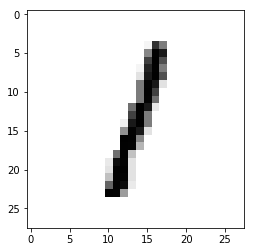

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    print("Accuracy: ", accuracy.eval(session=sess, 
                                          feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples -1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
                                 feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()